#**Lesson 6: Extrapolation**

##**An insight to the industry**

###**Groups of applications**

* **Horizontal**: In business, horizontal means something that you do across different kinds of business. i.e. everything involving marketing.

* **Vertical**: Something you do within a business or within a supply chain or a process.

###**Designing great data products**
Book from Jeremy Howard that teaches us how to turn machine learning models into stuff that makes money.
</br> </br>
The basic trick is the **Drivetrain Approach** which is these four steps:

* **Defined Objective:** We first of all have to define the real industry objective which is exactly what our client wants. Examples of objectives are:
I’m trying to sell more books or I’m trying to reduce the number of customers that leave next month or I’m trying to detect lung cancer earlier. 

* **Levers:** What is a lever an organization can pull to achive their objective? So let’s take the example of churn modeling. What is a lever that an organization could use to reduce the number of customers that are leaving? They could call someone and say “Are you happy? Anything we could do?” They could give them a free pen or something if they buy $20 worth of product next month. You could give them specials, etc. Working on this levers is thinking: how we are trying to achieve it being what are the actual things we can do to make that objective happen.So building a model is never ever a lever, but it could help you with the lever.

* **Data:** What data does the organization have that could possibly help them to set that lever to achieve that objective. So this is not only what data did they give you when you started the project but is what data you thinkg they could have that might help you achive the objective better. This is about letting your client know which data will be useful and if they have it, if not then how they can start collecting it.

* **Models:** We now have to put together our model, but this is not a model in the sense of a predictive model but it’s a model in the sense of a simulation model. So generally your simulation model contains a number of predictive models. So I had, for example, a predictive model called an elasticity model that said for a specific customer, if we charge them a specific price for a specific product, what’s the probability that they would say yes both when it’s new business and then a year later what’s the probability that they’ll renew. Then there’s another predictive model which is what’s the probability that they are going to make a claim and how much is that claim going to be. You can then combine these models together then to say all right, if we changed our pricing by reducing it by 10% for everybody between 18 and 25 and we can run it through these models that combined together into a simulation then the overall impact on our market share in 10 years time is X and our cost is Y and our profit is Z and so forth.
</br>
In practice, most of the time, you really are going to care more about the results of that simulation than you do about the predictive model directly.
So what if instead of creating a predictive model, Amazon had built an optimization model that could simulate and said if we show Jeremy this ad, how likely is he then to go on to buy this book and if I don’t show him this ad, how likely is he to go on to buy this book. So that’s the counterfactual. The counter factual is what would have happened otherwise, and then you can take the difference and say what should we recommend him that is going to maximally change his behavior. So maximally result in more books and so you’d probably say oh he’s never bought any Terry Pratchett book, he probably doesn’t know about Terry Pratchett but lots of people that liked Douglas Adams did turn out to like Terry Pratchett so let’s introduce him to a new author.
So it’s the difference between a predictive model on the one hand versus an optimization model on the other hand. So the two tend to go hand in hand.</br></br>First of all we have a simulation model. The simulation model is saying in the world where we put Terry Pratchett’s book on the front page of Amazon for Jeremy Howard, this is what would have happened. He would have bought it with a 94% probability. That then tells us with this lever of what do I put on my homepage for Jeremy today, we say okay the different settings of that lever that put Terry Pratchett on the homepage has the highest simulated outcome. Then that’s the thing which maximizes our profit from Jeremy’s visit to amazon.com today.
</br></br>So if we take the intersection between on the one hand, here are all the levers that we could pull (here are all the things we can do) and then here are all of the features from our random forest feature importance that turn out to be strong drivers of the outcome. So then the intersection of those is here are the levers we could pull that actually matter. Because if you can’t change the thing, that is not very interesting. And if it’s not actually a significant driver, it’s not very interesting. </br></br>So we can actually use our random forest feature importance to tell us what can we actually do to make a difference. Then we can use the partial dependence to actually build this kind of simulation model to say okay if we did change that, what would happen.

##**Experimentation**

For experimentation it's always good to use synthetic data sets, for instance forcing a linear change or some relation between our variables. For instance we could use something such as y = x1 + x2 + x1*x2, something where we know which variable interactions exists and which don't and you got to make sure that the feature importance you get a t the end is what you expected.
</br> </br>
A good way to do feature importance here besides the one we've already used would be to use our **tree interpreter** technique for all our rows and add up the delta they produce on the average for that to be our feature importance.

In [0]:
#You can edit source code from modules and they will update accordingly
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
#Needed imports
import sys
from fastai.imports import *
from fastai.tabular import *

sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks/L1RF')
from structured import *

# pandas???
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

from sklearn import metrics

Lets create our x's using linspace which creates some eavenly space data between start and stop (by default 50 observations) and for the y variable we would use our x's but we will add some small randomness to it to preserve the linear relation.

In [0]:
x = np.linspace(0, 1)
y = x + np.random.uniform(-0.2, 0.2, x.shape)

In [0]:
x.shape

(50,)

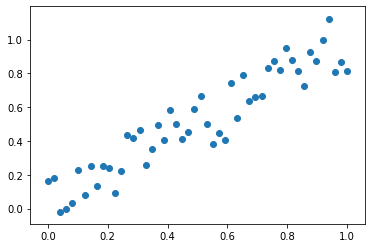

In [0]:
plt.scatter(x, y)

An important thing is that x is a 1d array (which means it only has 1 axis, it's from rank 1) and our model should be trained with a 2d array (or a df) where every column has a value. this means we should end up with this:

```
x=[
    [x0],  
    [x1]
    ...
    [xn]
  ]
```

The way we can turn this into a 2 dimensional array and what we can do for it is to simply slice it.

In [0]:
#rank = dimensions of tensor
print('rank: ', len(x1.shape))

rank:  2


In [0]:
#slicing our array
x1 = x[..., None]

Now we will take the first 40 elements of our data and use those as our traing set and the last 10 as our validation set for our Random Forest.

In [0]:
x_trn, x_val = x1[:40], x1[40:]
y_trn, y_val = y[:40], y[40:]

In [0]:
model = RandomForestRegressor().fit(x_trn, y_trn)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Now we will plot the relation of our actual values and our predictions for our training set. This must look as a linear relation.

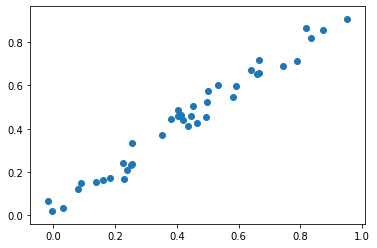

In [0]:
plt.scatter(y_trn, model.predict(x_trn))

This one will get more interesting. How will the same thing look but now with our validation set? It will look as a constant line over the actual values axis.

This random forest is uncapable of extrapolating to any kind of data outside the time period of our trainin set. There are various ways to deal with this problem:

* Trying to avoid unnecessary time dependent variables when we can. (Done in the last lesson).

* If we really hava a time series that looks like this we actually have to deal with the problem using probably:
 * Use a neuronal net
 * Detrend the data
 * Use a some sort of logistic regression

[0.904576 0.904576 0.904576 0.904576 0.904576 0.904576 0.904576 0.904576 0.904576 0.904576]


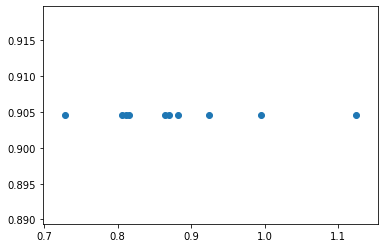

In [0]:
plt.scatter(y_val, model.predict(x_val))
print(model.predict(x_val))